In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
df = pd.read_csv("emissions.csv")
df2 = df[["project_name", "cpu_energy", "ram_energy"]]

In [3]:
df2 = df2.set_index("project_name")

Text(0.5, 0, '')

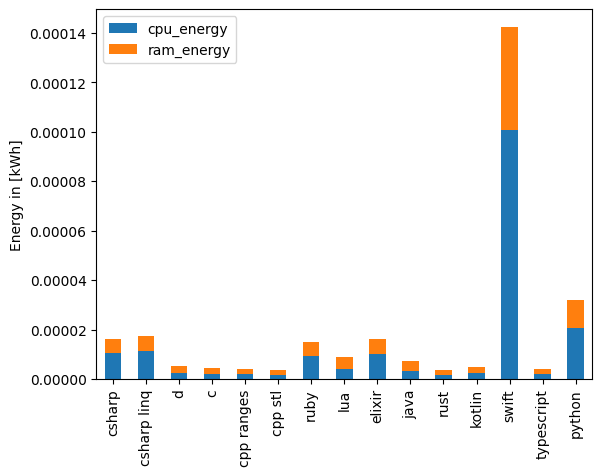

In [4]:
ax = df2.plot.bar(stacked=True)
plt.ylabel("Energy in [kWh]")
plt.xlabel("")
#ax.bar_label(ax.containers[0])

In [5]:
df2

,cpu_energy,ram_energy
project_name,,
csharp,0.000011,0.000006
csharp linq,0.000011,0.000006
d,0.000003,0.000003
c,0.000002,0.000002
cpp ranges,0.000002,0.000002
cpp stl,0.000002,0.000002
ruby,0.000009,0.000006
lua,0.000004,0.000005
elixir,0.000010,0.000006


In [6]:
df2["total_energy"] = df2.cpu_energy + df2.ram_energy

In [7]:
df2

,cpu_energy,ram_energy,total_energy
project_name,,,
csharp,0.000011,0.000006,0.000016
csharp linq,0.000011,0.000006,0.000017
d,0.000003,0.000003,0.000005
c,0.000002,0.000002,0.000004
cpp ranges,0.000002,0.000002,0.000004
cpp stl,0.000002,0.000002,0.000004
ruby,0.000009,0.000006,0.000015
lua,0.000004,0.000005,0.000009
elixir,0.000010,0.000006,0.000016


In [8]:
df2.sort_values("total_energy", ascending=False)

,cpu_energy,ram_energy,total_energy
project_name,,,
swift,0.000184,4.036288e-05,0.000224
rust,0.000089,1.960730e-05,0.000109
python,0.000046,1.006932e-05,0.000056
cpp ranges,0.000036,7.952882e-06,0.000044
cpp stl,0.000028,6.163543e-06,0.000034
elixir,0.000027,5.863723e-06,0.000033
csharp linq,0.000022,4.919935e-06,0.000027
ruby,0.000020,4.454521e-06,0.000025
csharp,0.000019,4.127192e-06,0.000023


In [8]:
min_val = df2.total_energy.min()
df2["normed_total_energy"] = df2.total_energy / min_val

In [9]:
df2

,cpu_energy,ram_energy,total_energy,normed_total_energy
project_name,,,,
csharp,0.000011,0.000006,0.000016,4.653198
csharp linq,0.000011,0.000006,0.000017,4.994966
d,0.000003,0.000003,0.000005,1.528530
c,0.000002,0.000002,0.000004,1.238105
cpp ranges,0.000002,0.000002,0.000004,1.120199
cpp stl,0.000002,0.000002,0.000004,1.059072
ruby,0.000009,0.000006,0.000015,4.347437
lua,0.000004,0.000005,0.000009,2.504060
elixir,0.000010,0.000006,0.000016,4.623566


In [10]:
df3 = df2[["normed_total_energy"]]

In [11]:
df3

,normed_total_energy
project_name,
csharp,4.653198
csharp linq,4.994966
d,1.528530
c,1.238105
cpp ranges,1.120199
cpp stl,1.059072
ruby,4.347437
lua,2.504060
elixir,4.623566


Text(0.5, 0, '')

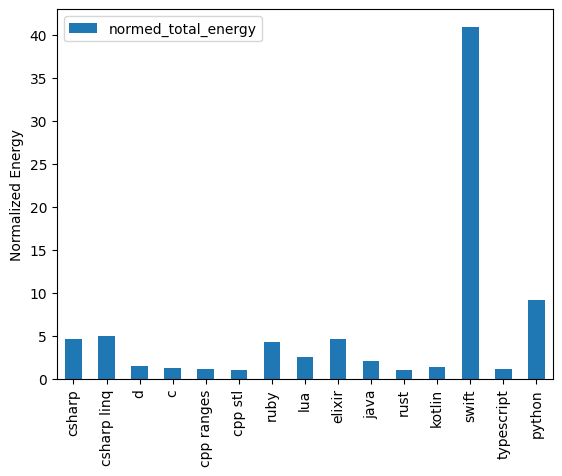

In [12]:
df3.plot.bar(stacked=True)
plt.ylabel("Normalized Energy")
plt.xlabel("")

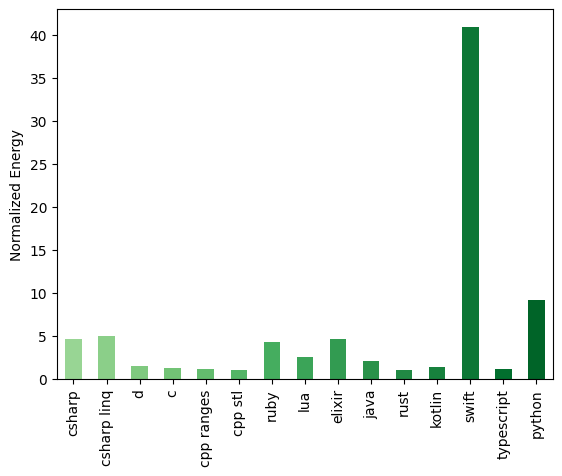

In [15]:
# Generate shades of green for each bar
colors = cm.Greens(np.linspace(0.4, 0.9, len(df3)))

ax = df3["normed_total_energy"].plot(kind="bar", color=colors)
plt.ylabel("Normalized Energy")
plt.xlabel("")
plt.show()